In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 子图

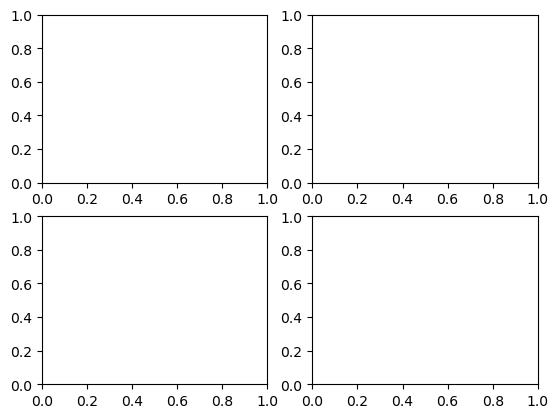

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

### 线

In [13]:
x = np.linspace(0, np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax1.plot(x,y_sin)
ax2.plot(x, y_sin, 'go--', linewidth=2, markersize=12)
ax3.plot(x, y_cos, color='red', marker='+', linestyle='dashed')

### 散点图

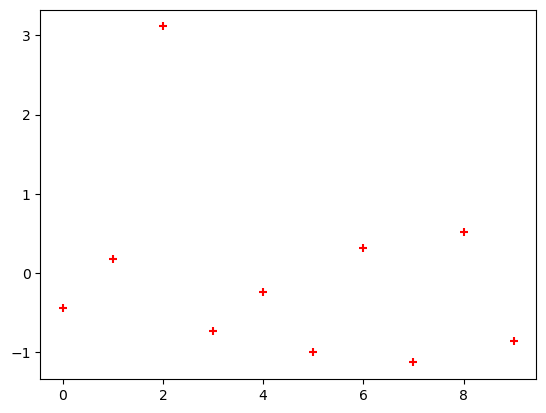

In [15]:
x =np.arange(10)
y = np.random.randn(10)
plt.scatter(x, y, color = 'red', marker = '+')
plt.show()

### 条形图

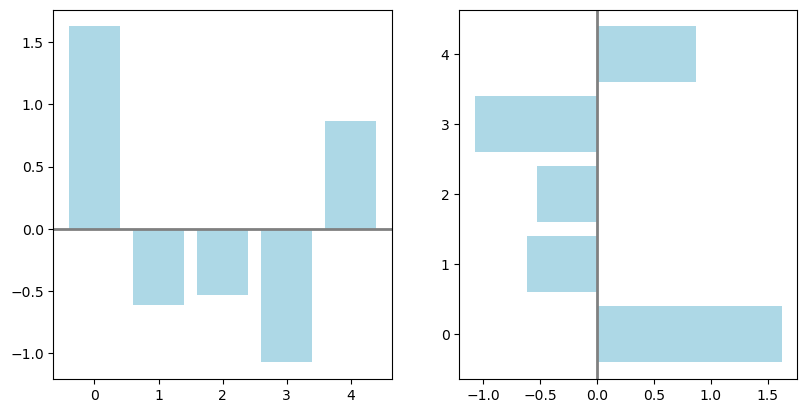

In [24]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2)) 
# 使得子图有一个完整的扩张

vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')

#在水平或者垂直方向上画线
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)
plt.show()

##### 条形图还返回了一个Artists 数组，对应着每个条形，例如上图 Artists 数组的大小为5，我们可以通过这些 Artists 对条形图的样式进行更改，如下例：

In [28]:
vert_bars

<BarContainer object of 5 artists>

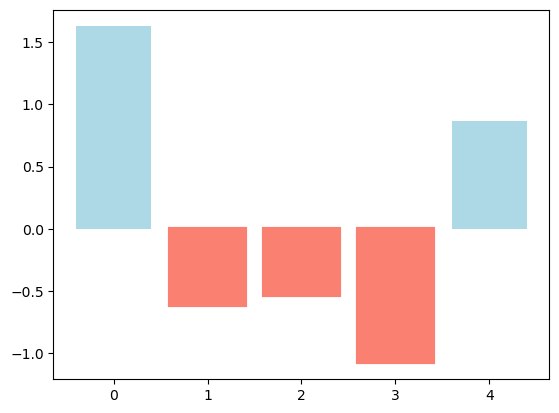

In [44]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y, color='lightblue', align='center')
# vert_bars相当每一个柱子

# 正的为蓝色，负的为红色
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(edgecolor='darkred', color='salmon', linewidth=3)

plt.show()

### 竖型条形图

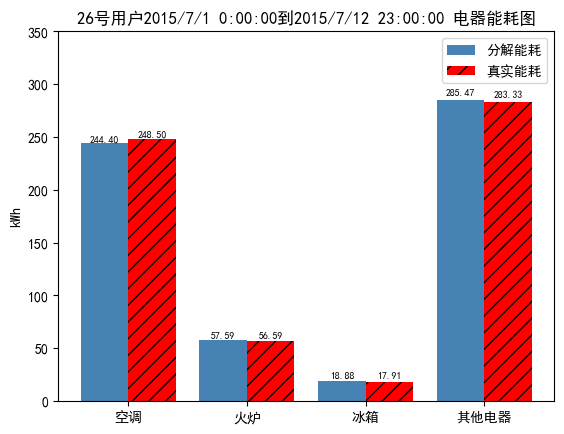

In [107]:
name_list=["空调","火炉","冰箱","其他电器"]
num_list = [244.39694,57.59,18.88,285.4701]#分解
num_list1 = [248.50326,56.595,17.913,283.33]#真实

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

width = 0.4
x = list(range(len(num_list)))
index_pre=np.arange(len(name_list))
index_ori=index_pre + width

plt.bar(index_pre,num_list,width,color = 'steelblue',tick_label =name_list,label = "分解能耗")
plt.bar(index_ori,num_list1,width,color = 'red',hatch='//',label = "真实能耗")

#柱子上的数字显示
for a,b in zip(index_pre,num_list):   
 plt.text(a,b+a,'%.2f'%b,ha='center',va='bottom',fontsize=7);
for a,b in zip(index_ori,num_list1):
 plt.text(a,b+a,'%.2f'%b,ha='center',va='bottom',fontsize=7);

plt.title("26号用户2015/7/1 0:00:00到2015/7/12 23:00:00 电器能耗图")
plt.legend(["分解能耗","真实能耗"],labelspacing=1)
plt.ylabel('kWh')
plt.xticks(index_pre + width/2, name_list)  # x刻度值居中显示
plt.ylim(0,350)
plt.legend()
plt.show()

## 制作横型条形图

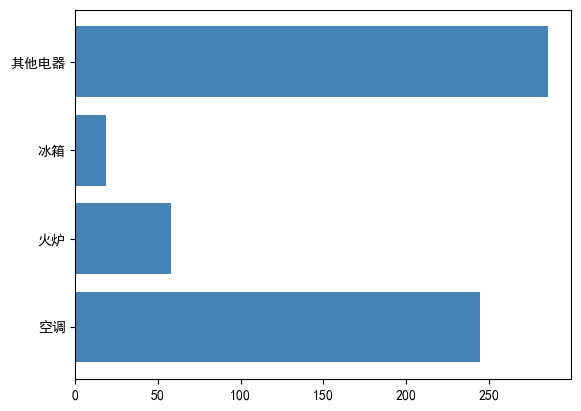

In [114]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.barh(index_pre,num_list,color = 'steelblue',tick_label =name_list,label = "分解能耗")
plt.show()

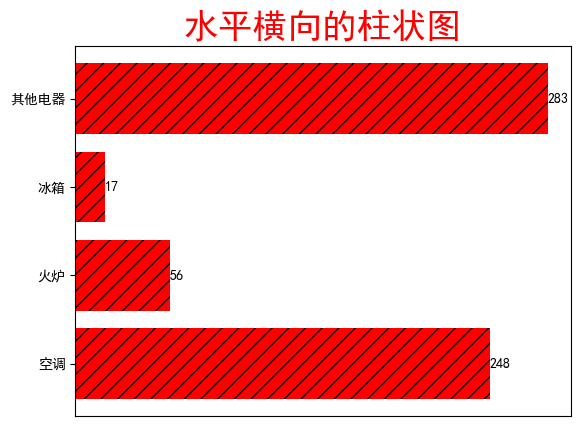

In [121]:
fig, ax = plt.subplots()
b = ax.barh(index_ori,num_list1,color = 'red',tick_label =name_list,hatch='//') # hatch可有可无，作用是柱形填充的东西
  
#为横向水平的柱图右侧添加数据标签
for rect in b:
    w = rect.get_width()
    h_s = rect.get_height()/2
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d' %
            int(w), ha='left', va='center')
 
#设置Y轴纵坐标上的刻度线标签
ax.set_yticks(range(len(name_list))+h_s)
ax.set_yticklabels(name_list)
 
#不要X横坐标上的label标签。
plt.xticks(())
 
# 标题设置
plt.title('水平横向的柱状图', loc='center', fontsize='25',
          fontweight='bold', color='red')

plt.show()

## 条形图综合折线图

In [208]:
proportion = []
for i in range(len(name_list)):
    pro = (num_list1[i]-num_list[i])/num_list1[i]
    proportion.append(pro)

In [209]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib import ticker
%matplotlib inline

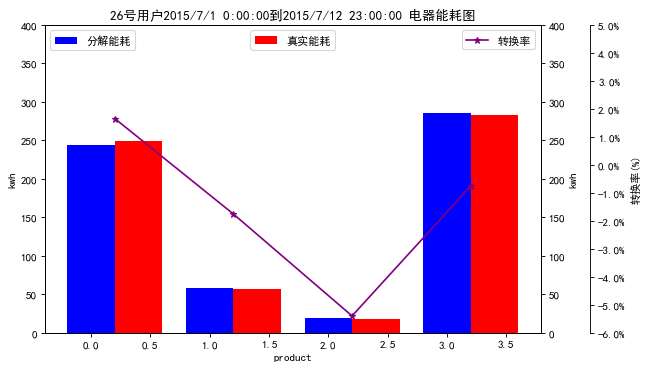

In [222]:
# 第一个坐标轴和图
fig = plt.figure(figsize=(8,5),dpi=80)
ax = fig.add_subplot(1,1,1)

# 画多个图，传递多个不同的x轴刻度
width = 0.4
x = list(range(len(num_list)))
index_pre=np.arange(len(name_list))
index_ori=index_pre+width

ax.set_ylabel('kwh')
ax.set_xlabel('product')
plt.bar(index_pre, num_list, width, label='分解能耗',color = 'blue')
plt.title('26号用户2015/7/1 0:00:00到2015/7/12 23:00:00 电器能耗图')
plt.ylim(0, 400)
ax.legend(loc = 'upper left')



# 第二个图(与第一图画到一起)
ax2 = ax.twinx()
ax2.spines['right'].set_position(('axes',1.0))
ax2.set_ylabel('kwh')
plt.bar(index_ori, num_list1, width, label='真实能耗',color = 'red')
plt.ylim(0, 400)
ax2.legend(loc = 'upper center')



# 第三个图
ax3 = ax.twinx()
ax3.spines['right'].set_position(('axes',1.1))
ax3.set_ylabel('转换率(%)')
plt.plot(index_pre+width/2, proportion, marker = '*',color ='purple', label='转换率')

ax3.legend(loc = 'upper right')
ax3.set_ylim(-0.06,0.05)
ax3.yaxis.set_major_locator(MultipleLocator(0.01))  # 自动以0.01为y轴刻度间隙
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1)) # 设置matplotlib绘图的y轴为百分比格式


plt.show()


